# Modelo de regressão linear simples

## Import e entendimento dos dados

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
df = pd.read_csv("..\\dados\\HousingPrices.csv")

In [3]:
df.shape

(1460, 2)

In [4]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [5]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


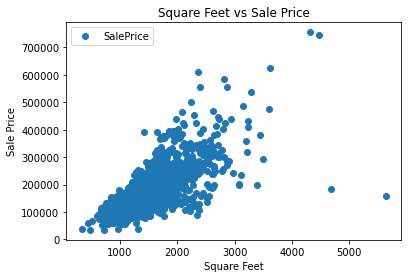

In [6]:
df.plot(x="SquareFeet", y="SalePrice", style="o")
plt.title("Square Feet vs Sale Price")
plt.xlabel("Square Feet")
plt.ylabel("Sale Price")
plt.show()

## Preparo dos Dados

In [11]:
sq_feet = df.iloc[:, :-1].values
sale_price = df.iloc[:, 1].values

In [12]:
sq_feet_train, sq_feet_test, sale_price_train, sale_price_test = train_test_split(
    sq_feet, sale_price, test_size=0.2, random_state=0
)

## Treinamento do Modelo

In [13]:
lin_reg = LinearRegression().fit(sq_feet_train, sale_price_train)
scores = cross_val_score(lin_reg, sq_feet_train, sale_price_train)

cross-validation -> k-fold

![Processo K-fold](https://miro.medium.com/max/700/1*kkMtezwv8qj1t9uG4nw_8g.png)

In [15]:
# Coeficiente de determinação, ou coeficiente R²

print(scores)
print(f"Score: {round(scores.mean(), 2)} (+/- {round(scores.std() * 2, 2)})")

[0.51542273 0.49093565 0.48083647 0.55585545 0.55633684]
Score: 0.52 (+/- 0.06)


In [16]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[110.26434426]
13330.293444921146


preço = 110.26 * área + 13330.29

## Previsões

In [17]:
sale_price_pred = lin_reg.predict(sq_feet_test)

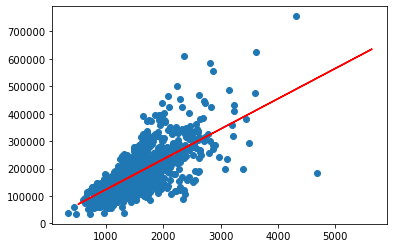

In [18]:
plt.scatter(sq_feet_train, sale_price_train)
plt.plot(sq_feet_test, sale_price_pred, color="red")
plt.show()

In [19]:
df_compare = pd.DataFrame({"Actual": sale_price_test, "Predicted": sale_price_pred})
df_compare.head()

,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


## Avaliação

In [20]:
print("Mean Absolute Error", metrics.mean_absolute_error(sale_price_test, sale_price_pred))
print("Mean Squared Error", metrics.mean_squared_error(sale_price_test, sale_price_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(sale_price_test, sale_price_pred)))

Mean Absolute Error 39364.76724953735
Mean Squared Error 3913788296.4027987
Root Mean Squared Error 62560.277304394986
